# Airlines 

In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
air = pd.read_excel("Airlines+Data.xlsx")

In [3]:
air.head(3)

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132


In [4]:
air.tail(3)

,Month,Passengers
93,2002-10-01,306
94,2002-11-01,271
95,2002-12-01,306


In [5]:
air.shape

(96, 2)

In [6]:
air.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [7]:
air["Month"].unique()

array(['1995-01-01T00:00:00.000000000', '1995-02-01T00:00:00.000000000',
       '1995-03-01T00:00:00.000000000', '1995-04-01T00:00:00.000000000',
       '1995-05-01T00:00:00.000000000', '1995-06-01T00:00:00.000000000',
       '1995-07-01T00:00:00.000000000', '1995-08-01T00:00:00.000000000',
       '1995-09-01T00:00:00.000000000', '1995-10-01T00:00:00.000000000',
       '1995-11-01T00:00:00.000000000', '1995-12-01T00:00:00.000000000',
       '1996-01-01T00:00:00.000000000', '1996-02-01T00:00:00.000000000',
       '1996-03-01T00:00:00.000000000', '1996-04-01T00:00:00.000000000',
       '1996-05-01T00:00:00.000000000', '1996-06-01T00:00:00.000000000',
       '1996-07-01T00:00:00.000000000', '1996-08-01T00:00:00.000000000',
       '1996-09-01T00:00:00.000000000', '1996-10-01T00:00:00.000000000',
       '1996-11-01T00:00:00.000000000', '1996-12-01T00:00:00.000000000',
       '1997-01-01T00:00:00.000000000', '1997-02-01T00:00:00.000000000',
       '1997-03-01T00:00:00.000000000', '1997-04-01

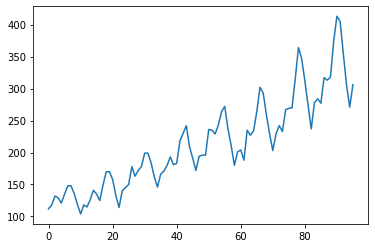

In [8]:
air.Passengers.plot()

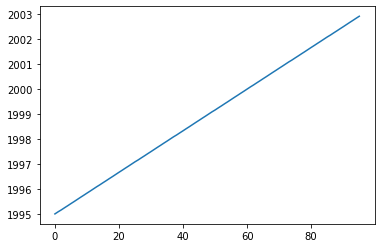

In [9]:
air.Month.plot()

In [10]:
air["Date"]=pd.to_datetime(air.Month,format="%b-%y")
air["Months"]=air.Date.dt.strftime("%b")
air["Year"]=air.Date.dt.strftime("%Y")

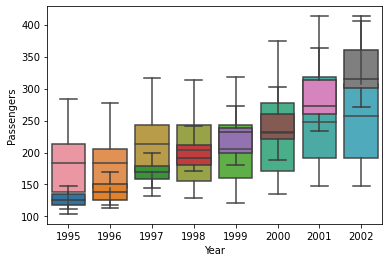

In [11]:

sns.boxplot(x="Months",y="Passengers",data=air)
sns.boxplot(x="Year",y="Passengers",data=air)


In [12]:

Month_Dummies = pd.DataFrame(pd.get_dummies(air['Months']))
air1 = pd.concat([air,Month_Dummies],axis = 1)


In [13]:
air1["t"] = np.arange(1,97)
air1["t_squared"] = air1["t"]*air1["t"]
air1["Log_Passengers"] = np.log(air1["Passengers"])


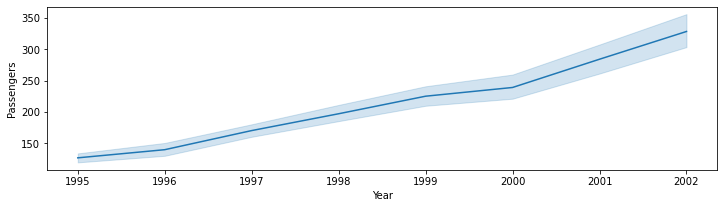

In [14]:

plt.figure(figsize=(12,3))
sns.lineplot(x="Year",y="Passengers",data=air)



In [15]:

Train = air1.head(80)
Test = air1.tail(16)


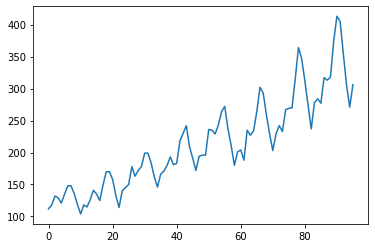

In [16]:
air1.Passengers.plot()

In [17]:
# Linear Model
import statsmodels.formula.api as smf 
linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear


47.54262406772677

In [18]:

# Exponential Model
Exp = smf.ols('Log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp


43.79373939334308

In [19]:

# Quadratic Model
Quad = smf.ols('Passengers~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad



43.65440369584248

In [20]:

# Additive seasonality
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

129.26647641443313

In [21]:
#  Multiplicative Seasonality


Mul_sea = smf.ols('Log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

135.32648414621084

In [22]:
#  Multiplicative Additive Seasonality

Mul_Add_sea = smf.ols('Log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 


9.469000230305973

# Coco_Cola_Sales

In [23]:
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
coco= pd.read_excel("CocaCola_Sales_Rawdata.xlsx",encoding='latin1')

In [25]:
coco.head(3)

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993


In [26]:
coco.tail(3)

,Quarter,Sales
39,Q4_95,4333.0
40,Q1_96,4194.0
41,Q2_96,5253.0


In [27]:
coco.shape

(42, 2)

In [28]:
coco.isnull().sum()

Quarter    0
Sales      0
dtype: int64

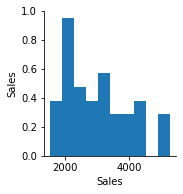

In [29]:
import seaborn as sns
sns.pairplot(coco)

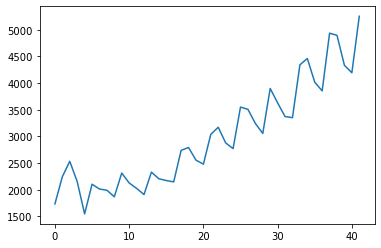

In [30]:
coco.Sales.plot()

In [31]:
coco['Quarters']= 0
coco['Year'] = 0
for i in range(42):
    p = coco["Quarter"][i]
    coco['Quarters'][i]= p[0:2]
    coco['Year'][i]= p[3:5]

<ipython-input-31-301badd64daa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coco['Quarters'][i]= p[0:2]
C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-31-301badd64daa>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coco['Year'][i]= p[3:5]


In [32]:
# Prepring dummies 
Quarters_Dummies = pd.DataFrame(pd.get_dummies(coco['Quarters']))
coco1 = pd.concat([coco,Quarters_Dummies],axis = 1)


In [33]:
coco1["t"]=np.arange(1,43)

In [34]:
coco1["t_squared"] = coco1["t"]*coco1["t"]
coco1.columns

Index(['Quarter', 'Sales', 'Quarters', 'Year', 'Q1', 'Q2', 'Q3', 'Q4', 't',
       't_squared'],
      dtype='object')

In [35]:
coco1["Log_Sales"]=np.log(coco1["Sales"])

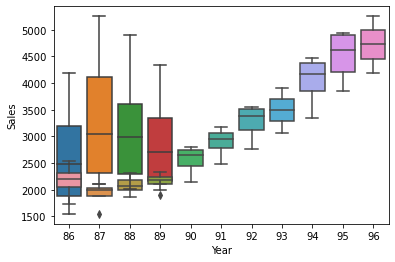

In [36]:
sns.boxplot(x="Quarters",y="Sales",data=coco1)
sns.boxplot(x="Year",y="Sales",data=coco1)



In [37]:
Train = coco1.head(38)
Test = coco1.tail(4)

In [38]:
# Linear model
import statsmodels.formula.api as smf
linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

591.5532957223963

In [39]:
# Exponential
Exp = smf.ols('Log_Sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

466.24797310672346

In [40]:
# Quadratic
Quad = smf.ols('Sales~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

475.56183518315095

In [41]:
# Additive seasonality
add_sea = smf.ols('Sales~Q1+Q2+Q3',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1','Q2','Q3']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea


1860.0238154547276

In [42]:
# Additive Seasonality Quadratic
add_sea_Quad = smf.ols('Sales~t+t_squared+Q1+Q2+Q3',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1','Q2','Q3','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad 


301.7380071934617

In [43]:

# Multiplicative Seasonality
Mul_sea = smf.ols('Log_Sales~Q1+Q2+Q3',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea


1963.389640077973

In [44]:
# Multiplicative Additive Seasonality
Mul_Add_sea = smf.ols('Log_Sales~t+Q1+Q2+Q3',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 


225.52439049818733

In [45]:

#tabulating the rmse values

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse



,MODEL,RMSE_Values
0,rmse_linear,591.553296
1,rmse_Exp,466.247973
2,rmse_Quad,475.561835
3,rmse_add_sea,1860.023815
4,rmse_add_sea_quad,301.738007
5,rmse_Mult_sea,1963.389640
6,rmse_Mult_add_sea,225.524390


# Plastic_Sales

In [46]:
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:

Plastic = pd.read_csv('PlasticSales.csv')


In [48]:
Plastic.head(3)

,Month,Sales
0,Jan-49,742
1,Feb-49,697
2,Mar-49,776


In [49]:
Plastic.tail(3)

,Month,Sales
57,Oct-53,1420
58,Nov-53,1119
59,Dec-53,1013


In [50]:
Plastic.shape

(60, 2)

In [51]:
Plastic.describe()

,Sales
count,60.000000
mean,1162.366667
std,266.431469
min,697.000000
25%,947.750000
50%,1148.000000
75%,1362.500000
max,1637.000000


In [52]:
Plastic.isnull().sum()

Month    0
Sales    0
dtype: int64

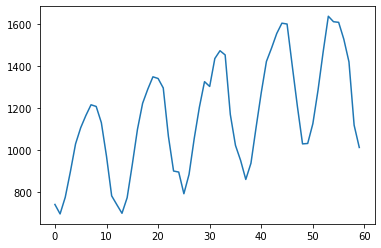

In [53]:
Plastic.Sales.plot()

In [54]:
Plastic["Date"]=pd.to_datetime(Plastic.Month,format="%b-%y")
Plastic["Months"]=Plastic.Date.dt.strftime("%b")
Plastic["Year"]=Plastic.Date.dt.strftime("%Y")

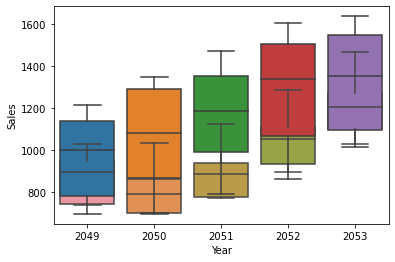

In [55]:

sns.boxplot(x="Months",y="Sales",data=Plastic)
sns.boxplot(x="Year",y="Sales",data=Plastic)


In [56]:

Month_Dummies_Plastic = pd.DataFrame(pd.get_dummies(Plastic['Months']))
P1 = pd.concat([Plastic,Month_Dummies_Plastic],axis = 1)


In [57]:
P1["t"] = np.arange(1,61)
P1["t_squared"] = P1["t"]*P1["t"]
P1["Log_Sales"] = np.log(P1["Sales"])



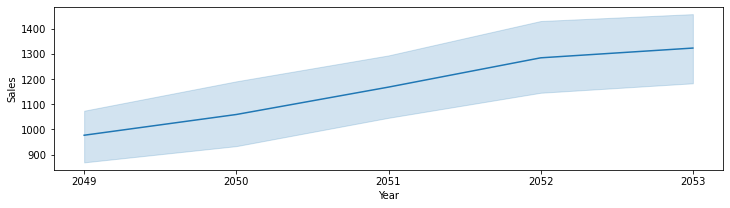

In [58]:

plt.figure(figsize=(12,3))
sns.lineplot(x="Year",y="Sales",data=Plastic)



In [59]:

Train = P1.head(50)
Test = P1.tail(10)


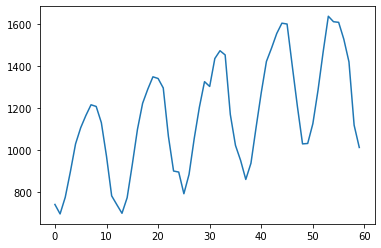

In [60]:
P1.Sales.plot()

In [61]:
# Linear Model
import statsmodels.formula.api as smf 
linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear


225.91579993224306

In [62]:

# Exponential Model
Exp = smf.ols('Log_Sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp


228.88308625341796

In [63]:

# Quadratic Model
Quad = smf.ols('Sales~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad



226.49907446751172

In [65]:

# Additive seasonality
add_sea = smf.ols('Sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

235.49981422497947